In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

keras.utils.set_random_seed(42)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


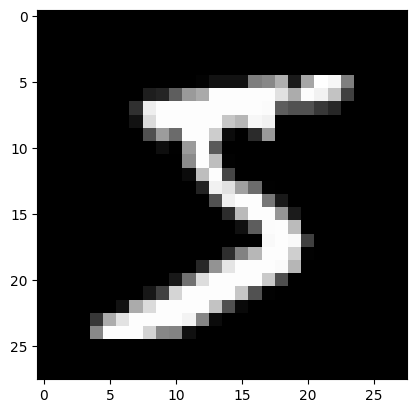

Label:5


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()
print(f"Label:{y_train[0]}")

# Preprocessing

In [ ]:
def preprocessing_mnist(x_train, x_test):
  x_train = x_train.astype("float32") / 255
  x_test = x_test.astype("float32") / 255

  x_train = np.expand_dims(x_train, -1)
  x_test = np.expand_dims(x_test, -1)
  return x_train, x_test


In [ ]:
x_train, x_test = preprocessing_mnist(x_train, x_test)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
input_shape=(28,28,1)

In [ ]:
batch_size  = 128
epochs = 15

# Initial Model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Why 18.496? You have 64 filters, and each filter has a kernel size of 3x3. That's 3 * 3 = 9 weights per filter.
The input to this layer has 32 channels (from the output of the previous layer). So, each filter needs to learn weights for all 32 input channels.
Each filter also has a single bias term.

Therefore, the total parameters for this layer are:

(3 * 3 * 32 + 1) * 64 = 18,496

(3 * 3 * 32) = Weights per filter

1 = Bias term per filter

64 = Total filters

In [ ]:
batch_size  = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7512 - loss: 0.8029 - val_accuracy: 0.9695 - val_loss: 0.1008
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9616 - loss: 0.1261 - val_accuracy: 0.9798 - val_loss: 0.0682
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9711 - loss: 0.0902 - val_accuracy: 0.9843 - val_loss: 0.0572
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9767 - loss: 0.0754 - val_accuracy: 0.9858 - val_loss: 0.0485
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9802 - loss: 0.0641 - val_accuracy: 0.9868 - val_loss: 0.0465
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9817 - loss: 0.0560 - val_accuracy: 0.9860 - val_loss: 0.0470
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9828 - loss: 0.0531 - val_accuracy: 0.9886 - val_loss: 0.0405
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9859 - loss: 0.0474 - val_accuracy: 0.

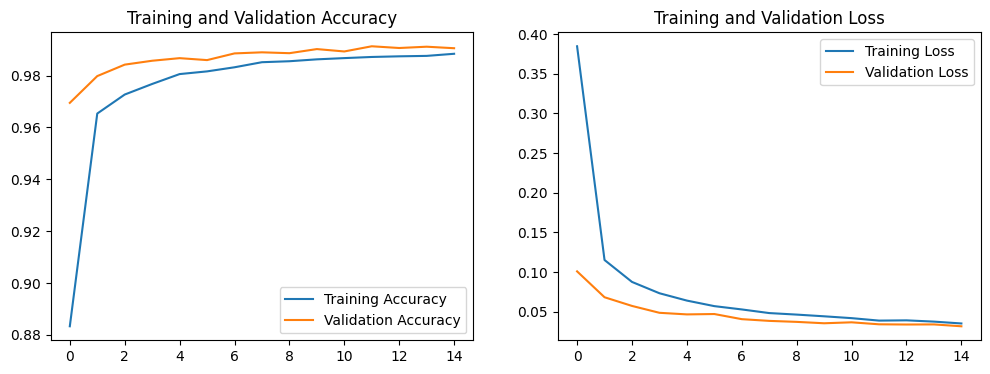

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02762540802359581
Test accuracy: 0.9911999702453613


# Smallest Model

In [ ]:
model_smallest = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.MaxPooling2D(pool_size=(28,28)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_smallest.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_smallest.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model_smallest.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0968 - loss: 2.3996 - val_accuracy: 0.0995 - val_loss: 2.3115
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0978 - loss: 2.3068 - val_accuracy: 0.1060 - val_loss: 2.3024
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3011 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1159 - loss: 2.3008 - val_accuracy: 0.

In [ ]:
score = model_smallest.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.3011958599090576
Test accuracy: 0.11349999904632568


Let's try replacing MaxPooling with AveragePooling. Intuitively, this should allow us to capture more information because MaxPooling highlights only the strongest features by selecting the highest value within a window, while AveragePooling considers all the values in the window.

In [ ]:
model_smallest = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.AveragePooling2D(pool_size=(28,28)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model_smallest.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ average_pooling2d (AveragePooling2D) │ (None, 1, 1, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_smallest.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model_smallest.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1275 - loss: 2.2996 - val_accuracy: 0.1873 - val_loss: 2.2956
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1764 - loss: 2.2933 - val_accuracy: 0.1718 - val_loss: 2.2914
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1729 - loss: 2.2887 - val_accuracy: 0.1721 - val_loss: 2.2874
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1756 - loss: 2.2845 - val_accuracy: 0.1749 - val_loss: 2.2835
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1790 - loss: 2.2805 - val_accuracy: 0.1768 - val_loss: 2.2797
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1814 - loss: 2.2766 - val_accuracy: 0.1781 - val_loss: 2.2760
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1833 - loss: 2.2728 - val_accuracy: 0.1794 - val_loss: 2.2724
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1850 - loss: 2.2692 - val_accuracy: 0.

In [ ]:
score = model_smallest.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.243715763092041
Test accuracy: 0.18889999389648438


The accuracy has increased

# First Model

Design and train a CNN with up to 7000 trainable parameters to obtain the best results on the MNIST dataset

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D

I tried to build a model with two convolutional layers, each having 8 filters of size 3x3

In [ ]:
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    AveragePooling2D((2, 2)),

    Conv2D(8, (3, 3), activation='relu'),
    AveragePooling2D((2, 2)),

    Flatten(),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 13, 13, 8)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 5, 5, 8)             │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,674 (10.45 KB)

 Trainable params: 2,674 (10.45 KB)

 Non-trainable params: 0 (0.00 B)

**Conv2D Layers**:
- The first convolutional layer has 8 filters of size $3 \times 3$, resulting in an output of $26 \times 26 \times 8$ because:

  $$\text{Output width/height} = \text{Input size} - \text{Filter size} + 1$$  
  Since no padding is used, this reduces the dimensions from $28 \times 28$ to $26 \times 26$.
- The second convolutional layer also uses 8 filters of size $3 \times 3$, applied to the down-sampled output of the first pooling layer, resulting in $11 \times 11 \times 8$.

**Pooling Layers**:
- **AveragePooling2D** reduces the spatial dimensions by computing the average of values in $2 \times 2$ windows.
- These layers progressively reduce the spatial size of the feature maps:
  - $26 \times 26 \to 13 \times 13$
  - $11 \times 11 \to 5 \times 5$
- Pooling helps with dimensionality reduction and retains the most salient features, improving computational efficiency.

**Flatten Layer**:
- The $5 \times 5 \times 8$ tensor (features) is flattened into a 1D vector of size $200$, which can then be fed to the fully connected layer.

**Dense Layer**:
- A fully connected layer with 10 neurons and a softmax activation function, designed to classify the input into one of 10 categories.




In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5982 - loss: 1.2765 - val_accuracy: 0.9189 - val_loss: 0.2878
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9181 - loss: 0.2816 - val_accuracy: 0.9442 - val_loss: 0.1981
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9420 - loss: 0.1985 - val_accuracy: 0.9561 - val_loss: 0.1586
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9545 - loss: 0.1578 - val_accuracy: 0.9628 - val_loss: 0.1380
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9611 - loss: 0.1355 - val_accuracy: 0.9647 - val_loss: 0.1256
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9641 - loss: 0.1216 - val_accuracy: 0.9673 - val_loss: 0.1174
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9666 - loss: 0.1122 - val_accuracy: 0.9690 - val_loss: 0.1120
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9685 - loss: 0.1053 - val_accuracy: 0.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9738


The performance has significantly improved compared to the smaller model. However, there is still room for improvement, as we can further increase the number of parameters

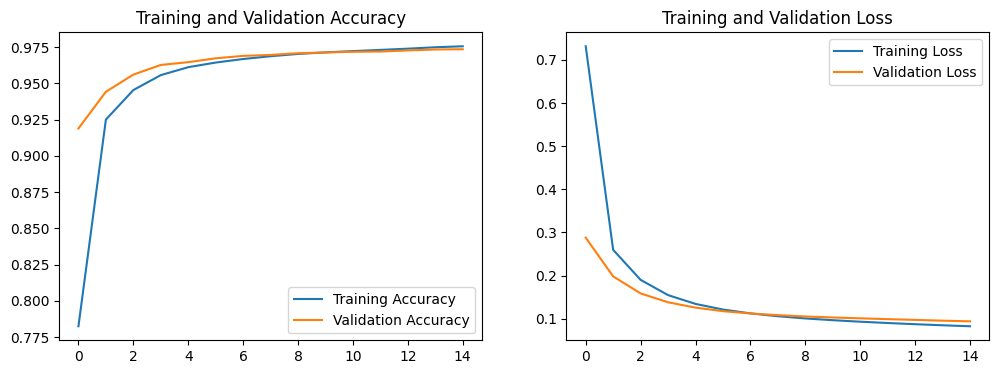

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The graph shows that the validation loss starts increasing compared to the training loss after around the eighth epoch, indicating that the model is beginning to slightly overfit

In [ ]:
val_predictions = model.predict(x_train[int(0.8 * len(x_train)):])
val_predictions_classes = np.argmax(val_predictions, axis=1)

y_val_true = np.argmax(y_train[int(0.8 * len(y_train)):], axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
import seaborn as sns

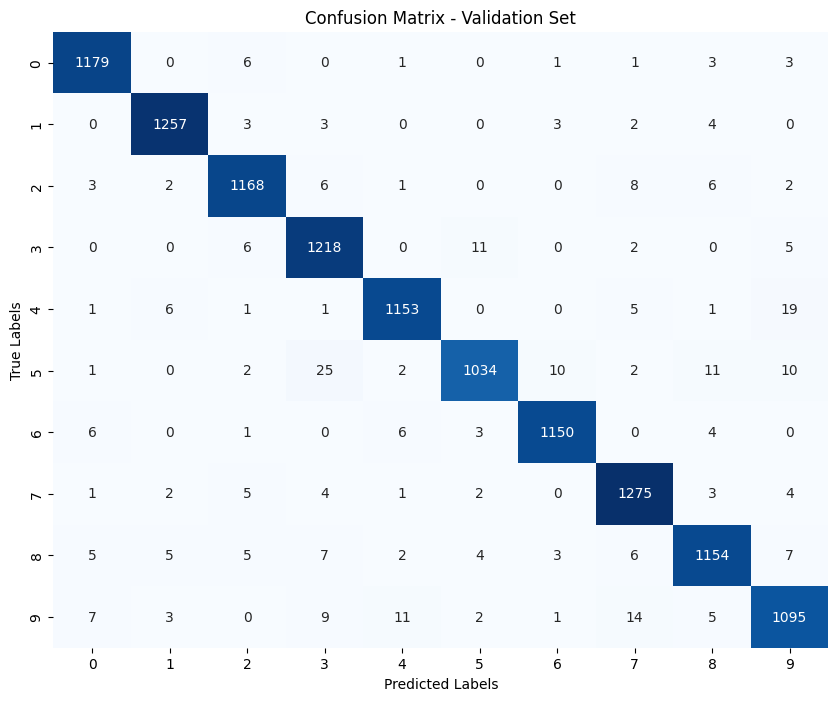

In [ ]:
conf_matrix = confusion_matrix(y_val_true, val_predictions_classes)
labels = list(range(1, 51))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Validation Set')
plt.show()

In [ ]:
report = classification_report(y_val_true, val_predictions_classes, target_names=[f'Class {i}' for i in range(10)])
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.98      1194
     Class 1       0.99      0.99      0.99      1272
     Class 2       0.98      0.98      0.98      1196
     Class 3       0.96      0.98      0.97      1242
     Class 4       0.98      0.97      0.98      1187
     Class 5       0.98      0.94      0.96      1097
     Class 6       0.98      0.98      0.98      1170
     Class 7       0.97      0.98      0.98      1297
     Class 8       0.97      0.96      0.97      1198
     Class 9       0.96      0.95      0.96      1147

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



# Second Model

I attempted to introduce BatchNormalization layers after each convolutional layer. BatchNormalization normalizes the activations of each layer during training, accelerating convergence and improving stability. It adds 32 trainable parameters per layer, as each filter has learnable scaling (gamma) and shifting (beta) parameters.

For the first pooling layer, I switched from AveragePooling to MaxPooling, as MaxPooling retains the most prominent features in each window, enhancing feature extraction for high-contrast or distinct features. For the second pooling layer, I maintained AveragePooling, which helps summarize information in later stages.

A new Dense layer with 16 units and a ReLU activation was added before the output layer. This change enables the model to learn more complex representations before making predictions.

Given the slight overfitting observed in the previous model, I also tested the inclusion of a Dropout layer with a rate of 0.3 after the Dense layer.

In [ ]:
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(8, (3, 3), activation='relu'),
    BatchNormalization(),
    AveragePooling2D((2, 2)),

    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 26, 26, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 11, 11, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 11, 11, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_13                 │ (None, 5, 5, 8)             │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 16)                  │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,114 (16.07 KB)

 Trainable params: 4,082 (15.95 KB)

 Non-trainable params: 32 (128.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5383 - loss: 1.3560 - val_accuracy: 0.8017 - val_loss: 0.6670
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8750 - loss: 0.3919 - val_accuracy: 0.9632 - val_loss: 0.1309
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9081 - loss: 0.2909 - val_accuracy: 0.9716 - val_loss: 0.0983
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9175 - loss: 0.2501 - val_accuracy: 0.9758 - val_loss: 0.0803
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9277 - loss: 0.2283 - val_accuracy: 0.9781 - val_loss: 0.0736
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9324 - loss: 0.2116 - val_accuracy: 0.9803 - val_loss: 0.0679
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9356 - loss: 0.1999 - val_accuracy: 0.9798 - val_loss: 0.0652
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9417 - loss: 0.1774 - val_accuracy: 0.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9820


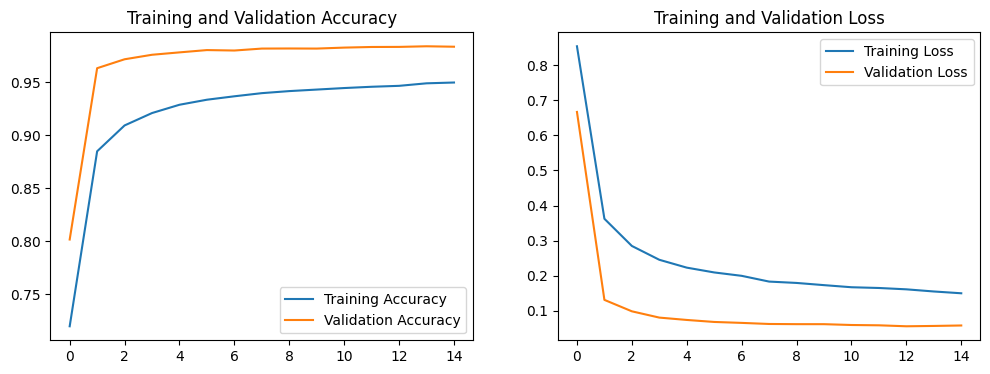

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The training accuracy steadily improves, reaching 94.88% by the final epoch. The validation accuracy consistently remains high, peaking at 98.34%. This indicates that the model generalizes well to unseen data.

The accuracy has increased. As a result of the dropout, the training accuracy is somewhat lower than the validation accuracy, where the network can utilize its full potential without the regularization effect of dropout.

In [ ]:
val_predictions = model.predict(x_train[int(0.8 * len(x_train)):])
val_predictions_classes = np.argmax(val_predictions, axis=1)

y_val_true = np.argmax(y_train[int(0.8 * len(y_train)):], axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


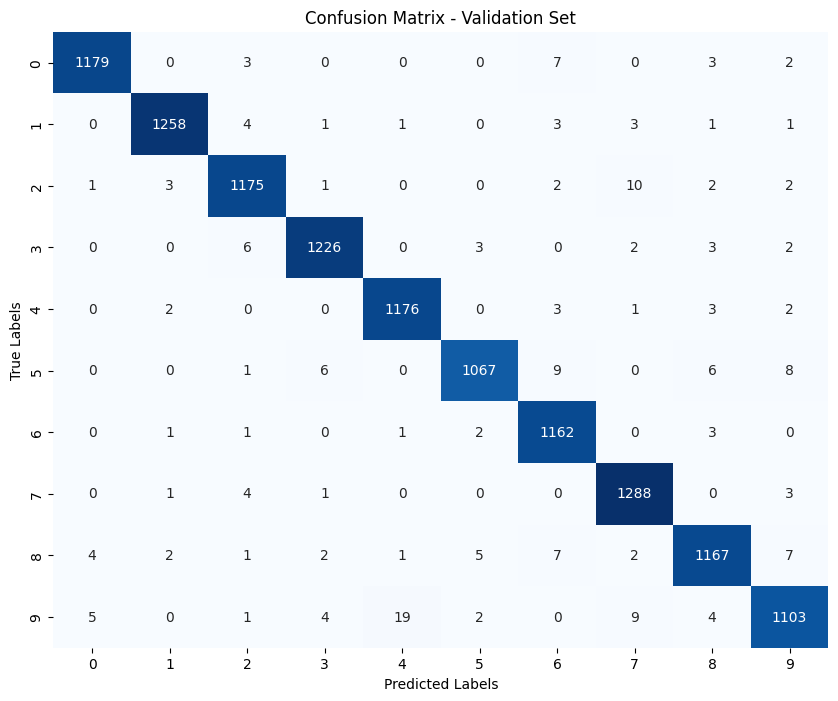

In [ ]:
conf_matrix = confusion_matrix(y_val_true, val_predictions_classes)
labels = list(range(1, 51))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Validation Set')
plt.show()

In [ ]:
report = classification_report(y_val_true, val_predictions_classes, target_names=[f'Class {i}' for i in range(10)])
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99      1194
     Class 1       0.99      0.99      0.99      1272
     Class 2       0.98      0.98      0.98      1196
     Class 3       0.99      0.99      0.99      1242
     Class 4       0.98      0.99      0.99      1187
     Class 5       0.99      0.97      0.98      1097
     Class 6       0.97      0.99      0.98      1170
     Class 7       0.98      0.99      0.99      1297
     Class 8       0.98      0.97      0.98      1198
     Class 9       0.98      0.96      0.97      1147

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



# Third Model

The implemented model has slightly more filters (10 compared to 8), which increases its capacity to learn more complex patterns, especially in the early stages of the network.

I have also reduced the filter size, using smaller (2x2) kernels compared to the previous model's (3x3) kernels. Smaller kernels capture finer details and potentially more granular features.

Both pooling layers now use Average Pooling, which generally provides smoother feature maps and may enhance generalization.

In the fully connected part of the network, instead of a single dense layer with 16 neurons, I have added two dense layers, each with 16 neurons, before the output layer.

Finally, I have reduced the dropout rate by 10%. This adjustment aims to minimize the gap between training and validation performance, improving the model's generalization.



In [ ]:
model = Sequential([
    Conv2D(10, (2, 2), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    AveragePooling2D((2, 2)),

    Conv2D(10, (2, 2), activation='relu'),
    BatchNormalization(),
    AveragePooling2D((2, 2)),

    Flatten(),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 27, 27, 10)          │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 27, 27, 10)          │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 13, 13, 10)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 10)          │             410 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 10)          │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 6, 6, 10)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 360)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │           5,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,758 (26.40 KB)

 Trainable params: 6,718 (26.24 KB)

 Non-trainable params: 40 (160.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5749 - loss: 1.2330 - val_accuracy: 0.7122 - val_loss: 0.9540
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8963 - loss: 0.3346 - val_accuracy: 0.9634 - val_loss: 0.1275
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9393 - loss: 0.2073 - val_accuracy: 0.9704 - val_loss: 0.1086
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9527 - loss: 0.1565 - val_accuracy: 0.9765 - val_loss: 0.0853
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9615 - loss: 0.1329 - val_accuracy: 0.9778 - val_loss: 0.0787
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9654 - loss: 0.1151 - val_accuracy: 0.9810 - val_loss: 0.0698
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9667 - loss: 0.1069 - val_accuracy: 0.9795 - val_loss: 0.0760
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9692 - loss: 0.1000 - val_accuracy: 0

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9845


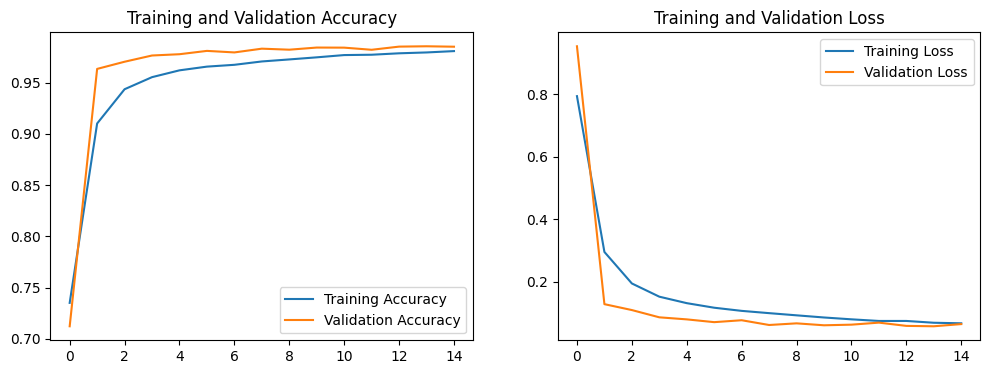

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
val_predictions = model.predict(x_train[int(0.8 * len(x_train)):])
val_predictions_classes = np.argmax(val_predictions, axis=1)

y_val_true = np.argmax(y_train[int(0.8 * len(y_train)):], axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


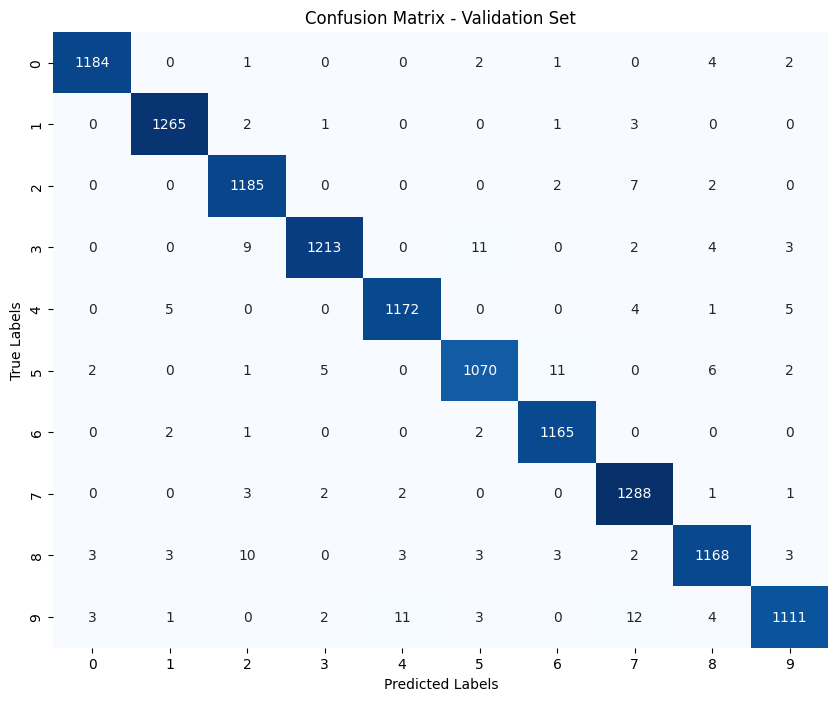

In [ ]:
conf_matrix = confusion_matrix(y_val_true, val_predictions_classes)
labels = list(range(1, 51))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Validation Set')
plt.show()

In [ ]:
report = classification_report(y_val_true, val_predictions_classes, target_names=[f'Class {i}' for i in range(10)])
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99      1194
     Class 1       0.99      0.99      0.99      1272
     Class 2       0.98      0.99      0.98      1196
     Class 3       0.99      0.98      0.98      1242
     Class 4       0.99      0.99      0.99      1187
     Class 5       0.98      0.98      0.98      1097
     Class 6       0.98      1.00      0.99      1170
     Class 7       0.98      0.99      0.99      1297
     Class 8       0.98      0.97      0.98      1198
     Class 9       0.99      0.97      0.98      1147

    accuracy                           0.99     12000
   macro avg       0.99      0.98      0.98     12000
weighted avg       0.99      0.99      0.99     12000



For now, this is the model with the best performance achieved

# Fourth Model

I am experimenting with increasing the filter size by using a 3x3 kernel, which provides a slightly larger receptive field and allows the model to capture more contextual information within the input.

I have kept the two Average Pooling layers.

For the dense layer, I opted for a single dense layer, which might capture more complex representations at once but could be prone to overfitting if the data is limited.

Additionally, I applied a higher dropout rate of 30% in this model to help prevent overfitting.

In [ ]:
model = Sequential([
    Conv2D(10, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    AveragePooling2D((2, 2)),

    Conv2D(10, (3, 3), activation='relu'),
    BatchNormalization(),
    AveragePooling2D((2, 2)),

    Flatten(),
    Dense(20, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 10)          │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 26, 26, 10)          │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_6                  │ (None, 13, 13, 10)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 11, 11, 10)          │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_7                  │ (None, 5, 5, 10)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 20)                  │           5,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,320 (24.69 KB)

 Trainable params: 6,280 (24.53 KB)

 Non-trainable params: 40 (160.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5817 - loss: 1.2269 - val_accuracy: 0.7264 - val_loss: 0.8313
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9105 - loss: 0.2906 - val_accuracy: 0.9678 - val_loss: 0.1084
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9367 - loss: 0.2021 - val_accuracy: 0.9807 - val_loss: 0.0689
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9482 - loss: 0.1648 - val_accuracy: 0.9809 - val_loss: 0.0636
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9536 - loss: 0.1465 - val_accuracy: 0.9817 - val_loss: 0.0607
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9579 - loss: 0.1302 - val_accuracy: 0.9821 - val_loss: 0.0585
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9589 - loss: 0.1253 - val_accuracy: 0.9848 - val_loss: 0.0553
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9637 - loss: 0.1119 - val_accuracy: 0.

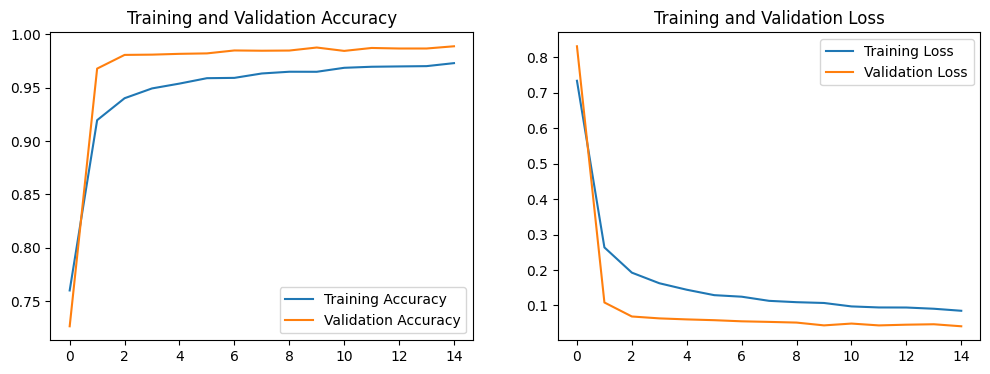

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9879


In [ ]:
val_predictions = model.predict(x_train[int(0.8 * len(x_train)):])
val_predictions_classes = np.argmax(val_predictions, axis=1)

y_val_true = np.argmax(y_train[int(0.8 * len(y_train)):], axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


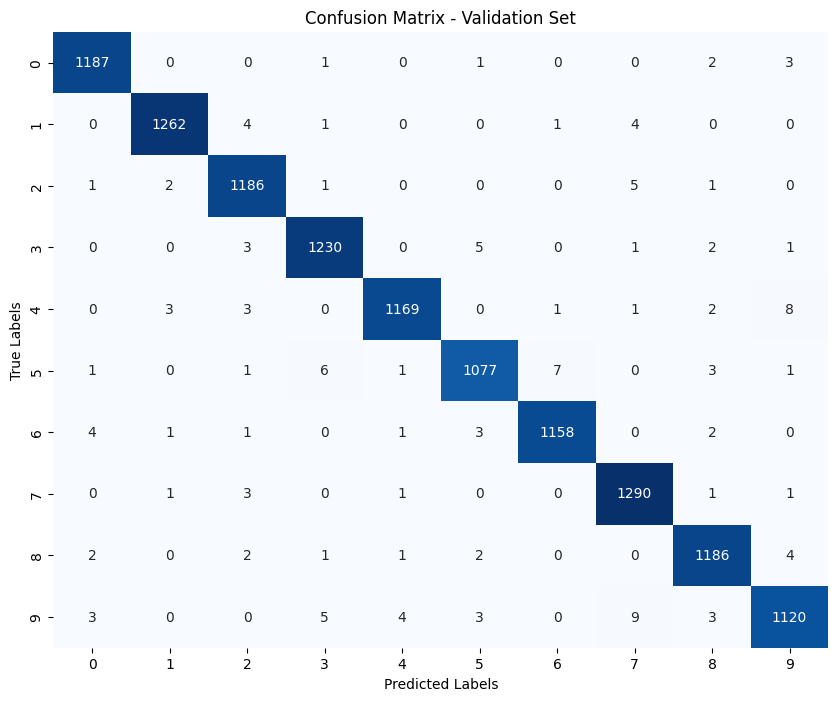

In [ ]:
conf_matrix = confusion_matrix(y_val_true, val_predictions_classes)
labels = list(range(1, 51))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Validation Set')
plt.show()

In [ ]:
report = classification_report(y_val_true, val_predictions_classes, target_names=[f'Class {i}' for i in range(10)])
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99      1194
     Class 1       0.99      0.99      0.99      1272
     Class 2       0.99      0.99      0.99      1196
     Class 3       0.99      0.99      0.99      1242
     Class 4       0.99      0.98      0.99      1187
     Class 5       0.99      0.98      0.98      1097
     Class 6       0.99      0.99      0.99      1170
     Class 7       0.98      0.99      0.99      1297
     Class 8       0.99      0.99      0.99      1198
     Class 9       0.98      0.98      0.98      1147

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



With these changes, the model performs even better than the previous one

# Fifth Model

Since the previous model achieved an accuracy of 98.77% on the test set, I will try building one last model with a single convolutional layer to see how much the performance decreases

In general, a single convolutional layer cannot capture complex patterns. However, given that the images in the dataset are relatively simple and lack highly intricate patterns, the performance should not be significantly impacted

In [ ]:
model = Sequential([
    Conv2D(6, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(6, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 26, 26, 6)           │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 26, 26, 6)           │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 13, 13, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 1014)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 6)                   │           6,090 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 10)                  │              70 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,244 (24.39 KB)

 Trainable params: 6,232 (24.34 KB)

 Non-trainable params: 12 (48.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4593 - loss: 1.5133 - val_accuracy: 0.8882 - val_loss: 0.9505
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7842 - loss: 0.6320 - val_accuracy: 0.9492 - val_loss: 0.2371
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8562 - loss: 0.4249 - val_accuracy: 0.9523 - val_loss: 0.1879
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8691 - loss: 0.3762 - val_accuracy: 0.9579 - val_loss: 0.1680
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8777 - loss: 0.3588 - val_accuracy: 0.9592 - val_loss: 0.1576
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8894 - loss: 0.3307 - val_accuracy: 0.9592 - val_loss: 0.1546
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8943 - loss: 0.3202 - val_accuracy: 0.9619 - val_loss: 0.1477
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8969 - loss: 0.3163 - val_accuracy: 0.

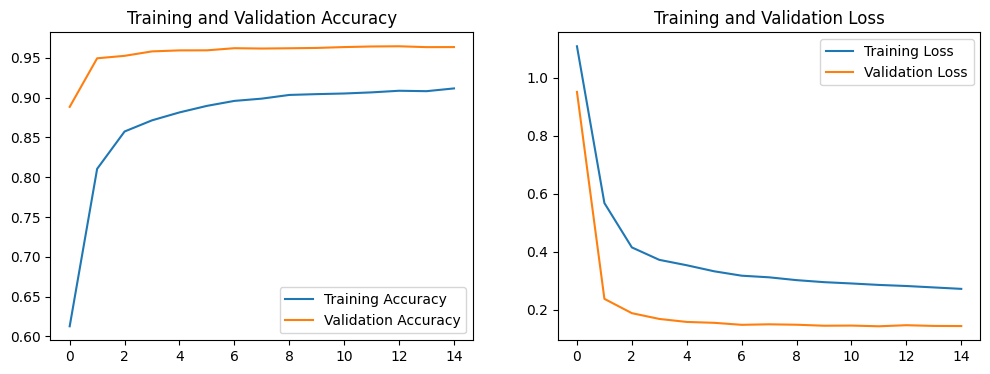

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9649


I tried adjusting the dropout percentage and even removing it entirely, but removing it leads to overfitting, while increasing it results in a significant gap between training and validation performance over the epochs

In [ ]:
val_predictions = model.predict(x_train[int(0.8 * len(x_train)):])
val_predictions_classes = np.argmax(val_predictions, axis=1)

y_val_true = np.argmax(y_train[int(0.8 * len(y_train)):], axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


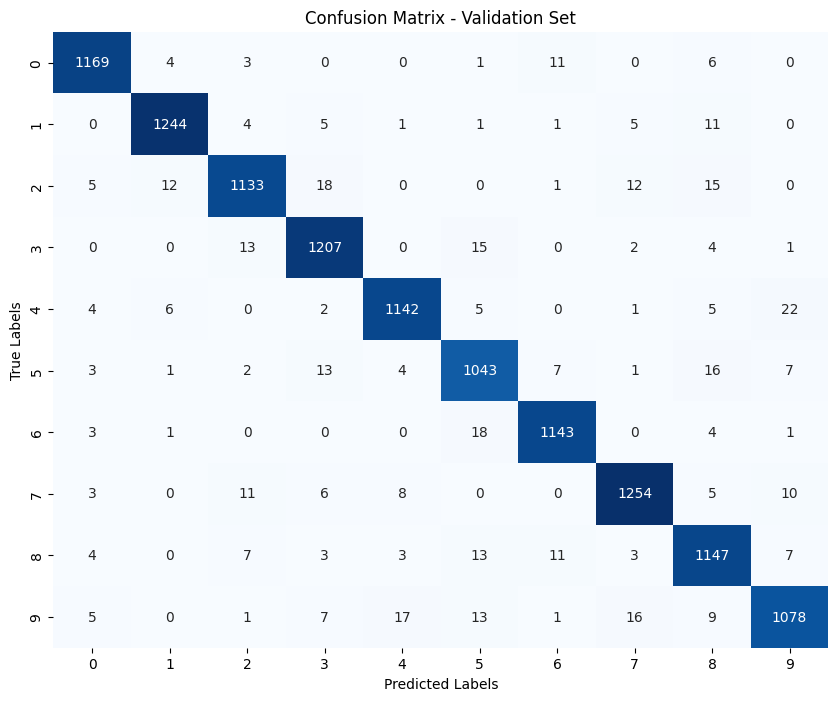

In [ ]:
conf_matrix = confusion_matrix(y_val_true, val_predictions_classes)
labels = list(range(1, 51))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Validation Set')
plt.show()

In [ ]:
report = classification_report(y_val_true, val_predictions_classes, target_names=[f'Class {i}' for i in range(10)])
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98      1194
     Class 1       0.98      0.98      0.98      1272
     Class 2       0.97      0.95      0.96      1196
     Class 3       0.96      0.97      0.96      1242
     Class 4       0.97      0.96      0.97      1187
     Class 5       0.94      0.95      0.95      1097
     Class 6       0.97      0.98      0.97      1170
     Class 7       0.97      0.97      0.97      1297
     Class 8       0.94      0.96      0.95      1198
     Class 9       0.96      0.94      0.95      1147

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000



# Conclusions

Model 4 is definitely the one with the best performance, achieving an accuracy of 98.77% on the validation set.